In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file, exact_m
from blume.run import ModelParameters, Results
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

# Determine optimal $\chi$

In [6]:
results = Results(varying_param="chi", range=[chi for chi in range(6, 31)])
params = ModelParameters(T_range=[T_c], tol=1e-9, b_c=True, fixed=True, bar=False, max_steps=196)
results.get(params)

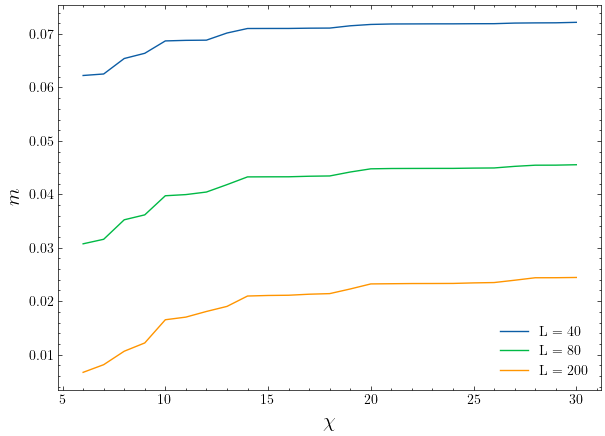

In [13]:
plt.figure(figsize=(7, 5))
for dir in ["03-05 13:41", "03-05 13:46", "03-05 13:47"]:
    mags, corrs = [], []
    chis = [chi for chi in range(6, 31)]
    for chi in chis:
        data = read(dir, f"chi{chi}")
        mags.extend(compute(Prop.m_fixed, data))
        corrs.extend(compute(Prop.xi_fixed, data))


    plt.plot(chis, mags, "-", label=f"L = {data['max_steps']+4}")

plt.legend()
plt.xlabel("$\chi$", fontsize=15) 
plt.ylabel("$m$", fontsize=15)
plt.locator_params(axis='x', nbins=7)

plt.show()

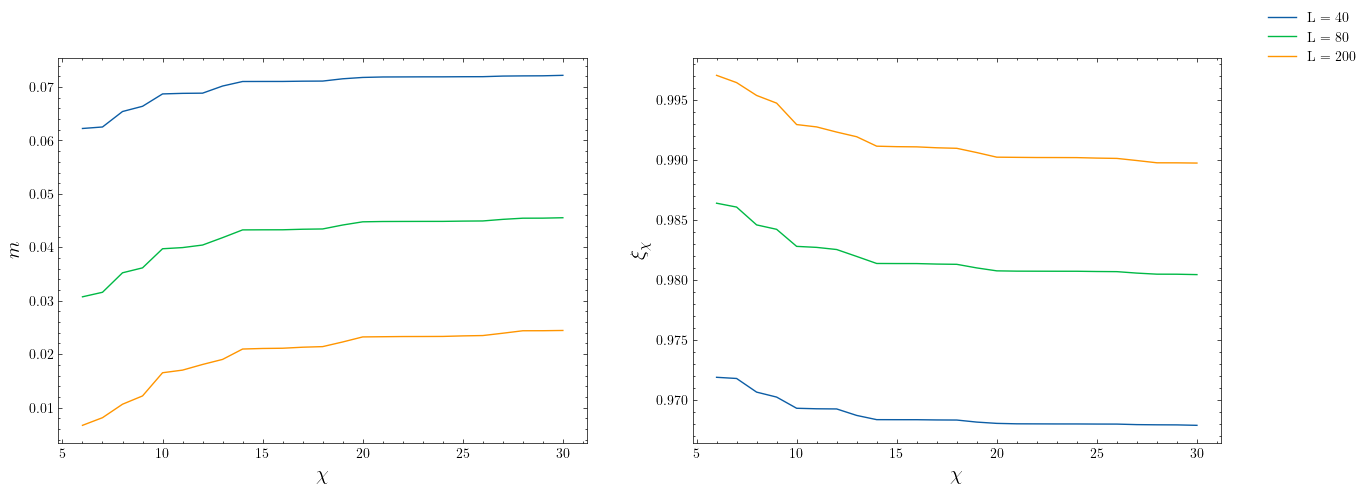

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for dir in ["03-05 13:41", "03-05 13:46", "03-05 13:47"]:
    mags, corrs = [], []
    chis = [chi for chi in range(6, 31)]
    for chi in chis:
        data = read(dir, f"chi{chi}")
        mags.extend(compute(Prop.m_fixed, data))
        corrs.extend(compute(Prop.xi_fixed, data))


    ax1.plot(chis, mags, "-", label=f"L = {data['max_steps']+4}")
    ax2.plot(chis, corrs, "-")

fig.legend()
ax1.set_xlabel("$\chi$", fontsize=15) 
ax1.set_ylabel("$m$", fontsize=15)
ax2.set_xlabel("$\chi$", fontsize=15)
ax2.set_ylabel(r"$\xi_{\chi}$", fontsize=15)
ax1.locator_params(axis='x', nbins=7)
ax2.locator_params(axis='x', nbins=7)

plt.show()

# Phase diagram of finite system

In [14]:
results = Results(varying_param="max_steps", range=[36, 76, 196])
params = ModelParameters(chi = 32, T_range=(2, 2.4), step=0.01, tol=1e-40, b_c=True, fixed=True)
results.get(params)

max_steps=36: 100%|██████████| 60/60 [00:02<00:00, 29.72it/s]


Saving data in folder: '03-05 15:27'
Done 



max_steps=76: 100%|██████████| 60/60 [00:04<00:00, 14.67it/s]


Saving data in folder: '03-05 15:27'
Done 



max_steps=196: 100%|██████████| 60/60 [00:09<00:00,  6.05it/s]


Saving data in folder: '03-05 15:27'
Done 



max_steps=996:  17%|█▋        | 10/60 [00:07<00:36,  1.38it/s]


KeyboardInterrupt: 

In [17]:
# Make dir for saving the plots
dir = "03-05 14:13"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

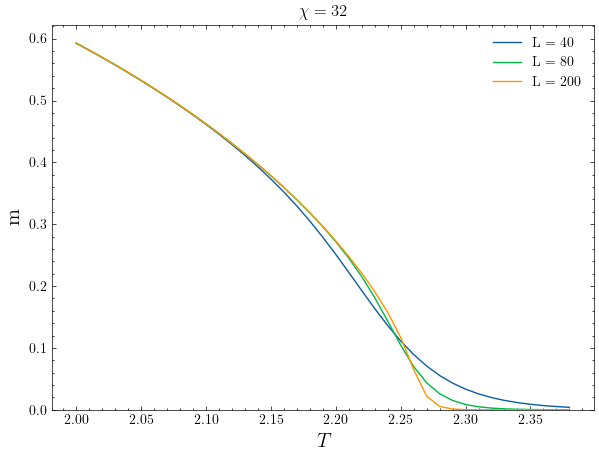

In [18]:
plt.figure(figsize=(7, 5))
T_range = (2, 2.4)
T, m = exact_m(T_range)
#plt.plot(T, m, "k-", label="Exact ($L = \infty$)")

for size in [36, 76, 196]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.m_fixed, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.title("$\chi = 32$")
plt.savefig(f"{path_dir}/magnetizations")

In [19]:
results = Results(varying_param="chi", range=[6, 16, 32])
params = ModelParameters(chi = 32, T_range=(2, 2.4), step=0.01, tol=1e-40, b_c=True, fixed=True, max_steps=76)
results.get(params)

chi=6: 100%|██████████| 40/40 [00:02<00:00, 14.41it/s]


Saving data in folder: '03-05 15:29'
Done 



chi=16: 100%|██████████| 40/40 [00:04<00:00,  9.53it/s]


Saving data in folder: '03-05 15:29'
Done 



chi=32: 100%|██████████| 40/40 [00:07<00:00,  5.39it/s]


Saving data in folder: '03-05 15:29'
Done 



In [20]:
# Make dir for saving the plots
dir = "03-05 15:29"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

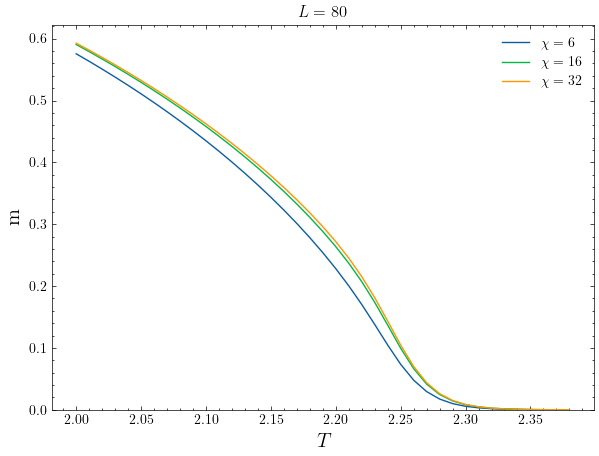

In [24]:
plt.figure(figsize=(7, 5))
T_range = (2, 2.4)
T, m = exact_m(T_range)
#plt.plot(T, m, "k-", label="Exact ($L = \infty$)")

for chi in [6, 16, 32]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.m_fixed, folder=dir)
    line.set_label(f"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.title("$L = 80$")
plt.savefig(f"{path_dir}/magnetizations")

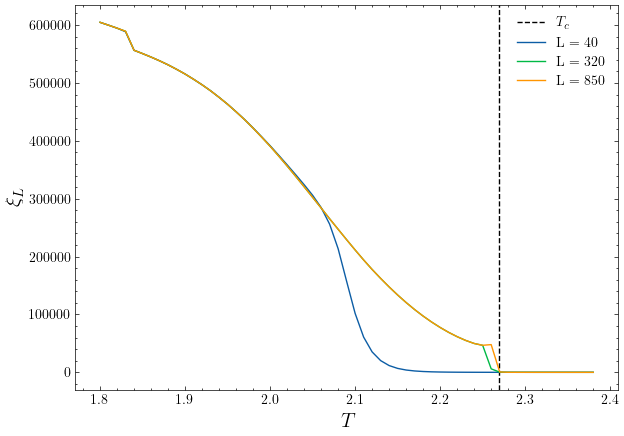

In [41]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (1.8, 2.4)
for size in [36, 316, 846]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi_{L}$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")

# Properties at $T_c$ for L and $\chi=64$

In [57]:
T_c = 2 / np.log(1 + np.sqrt(2))

params = ModelParameters(T_range=[T_c], chi=64, tol=1e-9, b_c=True, fixed=True, bar=False)
result = Results(varying_param="max_steps", range=[L for L in range(10, 500, 20)])
result.get(params)

KeyboardInterrupt: 

In [50]:
mags = []
sizes = [size for size in range(10, 500, 20)]
dir = "04-05 11:39"
for size in sizes:
    data = read(folder=dir, fn=f"max_steps{size}")
    mags.extend(compute(Prop.m_fixed, data))

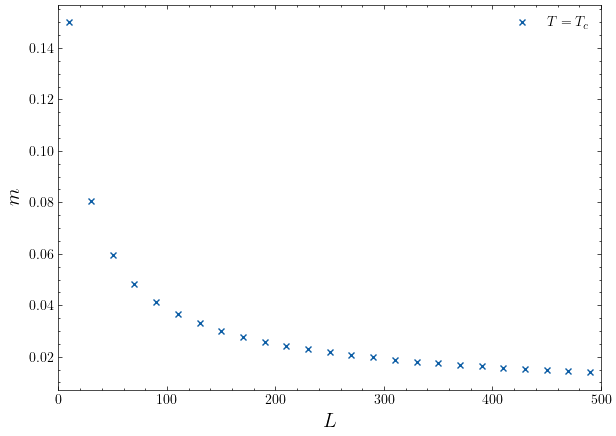

In [51]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, mags, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$L$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.xlim(0, 500)
plt.show()

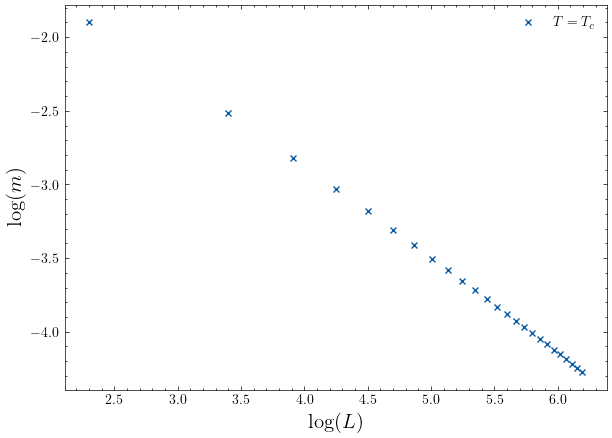

In [52]:
sizes_log = [np.log(L) for L in sizes]
mags_log = [np.log(m) for m in mags]

plt.figure(figsize=(7, 5))
plt.plot(sizes_log, mags_log, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$\log(L)$", fontsize=15)
plt.ylabel("$\log(m)$", fontsize=15)
plt.legend()
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 25
    # variables        = 2
    chi-square         = 0.00720065
    reduced chi-square = 3.1307e-04
    Akaike info crit   = -199.811497
    Bayesian info crit = -197.373745
    R-squared          = 0.99914583
[[Variables]]
    a:  0.61959937 +/- 0.00377751 (0.61%) (init = 0.5)
    b: -0.41450287 +/- 0.02006489 (4.84%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9843


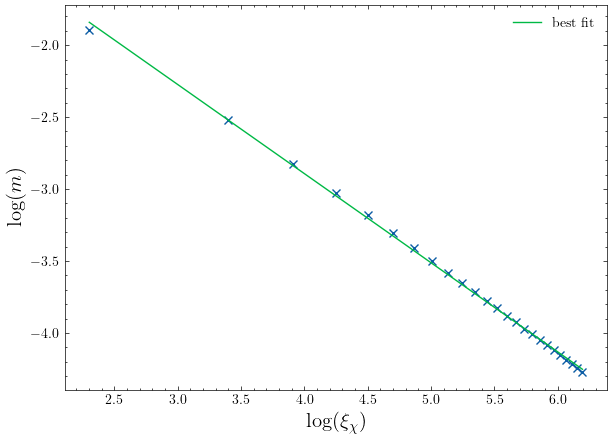

In [53]:
model = Model(lambda x, a, b: -a*x+b)

x, y = sizes_log, mags_log

params = model.make_params(a=0.5, b=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\log(L)$", fontsize=15)
plt.ylabel("$\log(m)$", fontsize=15)
plt.legend()
plt.show()

In [54]:
print(f"Obtained crit. exp.: {2 * result.params['a'].value} +/- {result.params['a'].stderr}")

Obtained crit. exp.: 1.239198742228506 +/- 0.0037775135535473947


In [41]:
import time

model = Model(lambda x, a, b: -a*x+b)
exponents = []
sizes = [L for L in range(10, 500, 20)]

for chi in range(2, 53, 5):
    mags = []
    params = ModelParameters(T_range=[T_c], chi=chi, tol=1e-9, b_c=True, fixed=True, bar=False)
    result = Results(varying_param="max_steps", range=[L for L in range(10, 500, 20)])
    result.get(params)

    for L in sizes:
        data = read(result.dir, f"max_steps{L}")
        mags.extend(compute(Prop.m_fixed, data))

    log_sizes = [np.log(L) for L in sizes]
    log_mags = [np.log(m) for m in mags]

    params = model.make_params(a=0.5, b=0.5)
    result = model.fit(log_mags, params, x=log_sizes)
    exponents.append((result.params['a'].value, result.params['a'].stderr))

    time.sleep(60)

In [42]:
exponents, errors = zip(*exponents)

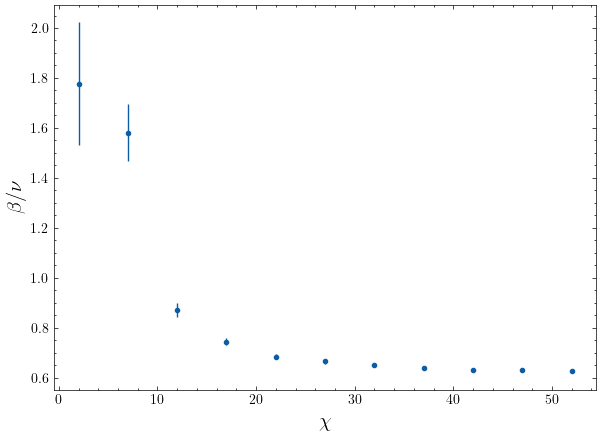

In [44]:
chis = [chi for chi in range(2, 53, 5)]
plt.figure(figsize=(7, 5))
plt.errorbar(chis,exponents, yerr = errors, fmt="o", markersize=3)
plt.ylabel(r"$\beta / 2\nu $", fontsize=15)
plt.xlabel(r"$\chi$", fontsize=15)
plt.show()

In [46]:
print(f"Obtained crit. exp.: {2* exponents[-1]} +/- {errors[-1]}")

Obtained crit. exp.: 1.2519032768362202 +/- 0.004368244185524344
